## Name: Shivkumar G. Chauhan
### Roll No.: CS8A53
### Batch A-3
---
# Experiment - 5 : Apply Data Transformation and Data Reduction on the dataset.

## imports

In [6]:
import pandas
import numpy
import warnings
from sklearn import preprocessing
from sklearn.decomposition import PCA
import matplotlib.pyplot as pyplot

## Configurations

In [8]:
Normalizer=preprocessing.Normalizer(
    norm='max'
)
StandardScaler=preprocessing.StandardScaler(
    with_mean=False,
    with_std=True
)
MinmaxScaler=preprocessing.MinMaxScaler()
OuatileScaler=preprocessing.QuantileTransformer()
MaxABSScaler=preprocessing.MaxAbsScaler()
RobustScaler=preprocessing.RobustScaler()

In [7]:
%matplotlib inline
pyplot.rcParams["figure.figsize"] = (15, 12)

hiding warnings

In [9]:
warnings.filterwarnings('ignore')

reading dataset

In [10]:
Raw_Data=pandas.read_csv("./Data/Raw_Data/owid-covid-data.csv",date_parser='date')

Sorting the Dataframe using total_cases column

selecting specific columns

In [11]:
Raw_Data=Raw_Data.sort_values(
    by="total_cases",
    ascending=True
).reset_index(drop=True)

In [12]:
Selected_Columns=['iso_code','date', 'continent', 'location', 'total_cases','new_cases', 'total_deaths', 'new_deaths','population','life_expectancy']

Location Specific Data

Last Updated Aggreated Data

In [13]:
location="World"

In [14]:
Aggregated_Data_by_Location=Raw_Data.groupby(
    by='location'
).max('total_cases')

In [15]:
Location_Specific_Data=Raw_Data[
    Raw_Data['location']==location
]

## Final Function for Whole Data Processing for Covid Data

In [23]:
def PreprocessTheCovidData(Main_Data,Selected_columns)->pandas.DataFrame:
    Main_Data=Main_Data[Selected_Columns]
    for index in Main_Data['location'].value_counts().index:
        if len(Main_Data[Main_Data['location']==index]['total_cases'].unique())<2:
            Main_Data=Main_Data[Main_Data['location']!=index]
    for index in Main_Data[Main_Data['continent'].isnull()==True]['location'].value_counts().index:
        if index.find("income")!=-1:
            Main_Data[Main_Data['location']==index]=Main_Data[Main_Data['location']==index].fillna(value={"continent":"Income Based"})
        elif index.find("Europe")!=-1:
            Main_Data[Main_Data['location']==index]=Main_Data[Main_Data['location']==index].fillna(value={"continent":"Europe"})
        elif index.find("International")!=-1 or index.find("World")!=-1:
            Main_Data[Main_Data['location']==index]=Main_Data[Main_Data['location']==index].fillna(value={"continent":"World"})
        else:
            Main_Data[Main_Data['location']==index]=Main_Data[Main_Data['location']==index].fillna(value={"continent":index})
    for index in Main_Data[Main_Data['life_expectancy'].isnull()==False]['continent'].value_counts().index:
        Main_Data[Main_Data['continent']==index]=Main_Data[Main_Data['continent']==index].fillna(value={"life_expectancy":Main_Data[Main_Data['continent']==index]['life_expectancy'].mean()})
    Main_Data=Main_Data.fillna(value={"life_expectancy":Main_Data['life_expectancy'].mean()})
    Main_Data['population']=Main_Data['population'].fillna(Main_Data[Main_Data['location']=='International']['total_cases'].max())
    Main_Data[['new_cases','new_deaths']]=Main_Data[['new_cases','new_deaths']].fillna(0)
    for index in Main_Data['location'].value_counts().index:
        Main_Data[Main_Data['location']==index]=Main_Data[Main_Data['location']==index].fillna(0,limit=1)
        Main_Data[Main_Data['location']==index]=Main_Data[Main_Data['location']==index].fillna(method='ffill')
    return Main_Data

# Data Preprocessing

Selection of Data on which Preprocessing should be performed and also creating backup of original Data

In [24]:
Main_Data=Location_Specific_Data.copy()

In [25]:
Main_Data

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
31214,OWID_WRL,NaN,World,2020-01-22,557.0,0.0,NaN,17.0,0.0,NaN,...,34.635,60.13,2.705,72.58,0.737,7.975105e+09,NaN,NaN,NaN,NaN
32256,OWID_WRL,NaN,World,2020-01-23,657.0,100.0,NaN,18.0,1.0,NaN,...,34.635,60.13,2.705,72.58,0.737,7.975105e+09,NaN,NaN,NaN,NaN
36436,OWID_WRL,NaN,World,2020-01-24,944.0,287.0,NaN,26.0,8.0,NaN,...,34.635,60.13,2.705,72.58,0.737,7.975105e+09,NaN,NaN,NaN,NaN
40321,OWID_WRL,NaN,World,2020-01-25,1437.0,493.0,NaN,42.0,16.0,NaN,...,34.635,60.13,2.705,72.58,0.737,7.975105e+09,NaN,NaN,NaN,NaN
44701,OWID_WRL,NaN,World,2020-01-26,2120.0,683.0,NaN,56.0,14.0,NaN,...,34.635,60.13,2.705,72.58,0.737,7.975105e+09,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242557,OWID_WRL,NaN,World,2023-02-08,672183247.0,228269.0,179518.429,6849409.0,1896.0,1908.429,...,34.635,60.13,2.705,72.58,0.737,7.975105e+09,NaN,NaN,NaN,NaN
242558,OWID_WRL,NaN,World,2023-02-09,672440247.0,257000.0,179259.857,6851332.0,2259.0,1851.000,...,34.635,60.13,2.705,72.58,0.737,7.975105e+09,NaN,NaN,NaN,NaN
242559,OWID_WRL,NaN,World,2023-02-10,672581763.0,142758.0,165649.000,6852711.0,1422.0,1733.286,...,34.635,60.13,2.705,72.58,0.737,7.975105e+09,NaN,NaN,NaN,NaN
242560,OWID_WRL,NaN,World,2023-02-11,672713246.0,131483.0,169768.429,6853333.0,622.0,1268.857,...,34.635,60.13,2.705,72.58,0.737,7.975105e+09,NaN,NaN,NaN,NaN


## Data Cleaning

In [26]:
Main_Data=PreprocessTheCovidData(Main_Data.copy().reset_index(drop=True),Selected_Columns)

In [27]:
for index in Main_Data['location'].value_counts().index:
    if len(Main_Data[Main_Data['location']==index]['total_cases'].unique())<2:
        print(index,end=" ")
        print(Main_Data[Main_Data['location']==index]['total_cases'].unique(),end=" ")
        print(len(Main_Data[Main_Data['location']==index]['total_cases'].unique()),end=" ")
        Main_Data=Main_Data[Main_Data['location']!=index]
BackupData=Main_Data.copy()

In [28]:
BackupData

,iso_code,date,continent,location,total_cases,new_cases,total_deaths,new_deaths,population,life_expectancy
0,OWID_WRL,2020-01-22,World,World,557.0,0.0,17.0,0.0,7.975105e+09,72.58
1,OWID_WRL,2020-01-23,World,World,657.0,100.0,18.0,1.0,7.975105e+09,72.58
2,OWID_WRL,2020-01-24,World,World,944.0,287.0,26.0,8.0,7.975105e+09,72.58
3,OWID_WRL,2020-01-25,World,World,1437.0,493.0,42.0,16.0,7.975105e+09,72.58
4,OWID_WRL,2020-01-26,World,World,2120.0,683.0,56.0,14.0,7.975105e+09,72.58
...,...,...,...,...,...,...,...,...,...,...
1113,OWID_WRL,2023-02-08,World,World,672183247.0,228269.0,6849409.0,1896.0,7.975105e+09,72.58
1114,OWID_WRL,2023-02-09,World,World,672440247.0,257000.0,6851332.0,2259.0,7.975105e+09,72.58
1115,OWID_WRL,2023-02-10,World,World,672581763.0,142758.0,6852711.0,1422.0,7.975105e+09,72.58
1116,OWID_WRL,2023-02-11,World,World,672713246.0,131483.0,6853333.0,622.0,7.975105e+09,72.58


## Data Transformation

### 1.  Attribution

#### creating new Attribute death_percentage on new cases

In [29]:
Main_Data['death_percentage_for_new_cases']=[100*i[1]/max(1,i[0]) for  i in Main_Data[['new_cases','new_deaths']].to_numpy()]

In [30]:
Main_Data

,iso_code,date,continent,location,total_cases,new_cases,total_deaths,new_deaths,population,life_expectancy,death_percentage_for_new_cases
0,OWID_WRL,2020-01-22,World,World,557.0,0.0,17.0,0.0,7.975105e+09,72.58,0.000000
1,OWID_WRL,2020-01-23,World,World,657.0,100.0,18.0,1.0,7.975105e+09,72.58,1.000000
2,OWID_WRL,2020-01-24,World,World,944.0,287.0,26.0,8.0,7.975105e+09,72.58,2.787456
3,OWID_WRL,2020-01-25,World,World,1437.0,493.0,42.0,16.0,7.975105e+09,72.58,3.245436
4,OWID_WRL,2020-01-26,World,World,2120.0,683.0,56.0,14.0,7.975105e+09,72.58,2.049780
...,...,...,...,...,...,...,...,...,...,...,...
1113,OWID_WRL,2023-02-08,World,World,672183247.0,228269.0,6849409.0,1896.0,7.975105e+09,72.58,0.830599
1114,OWID_WRL,2023-02-09,World,World,672440247.0,257000.0,6851332.0,2259.0,7.975105e+09,72.58,0.878988
1115,OWID_WRL,2023-02-10,World,World,672581763.0,142758.0,6852711.0,1422.0,7.975105e+09,72.58,0.996091
1116,OWID_WRL,2023-02-11,World,World,672713246.0,131483.0,6853333.0,622.0,7.975105e+09,72.58,0.473065


### 2. Normalization

In [31]:
Normalizer.fit_transform(Main_Data[Main_Data.describe().columns])

array([[6.98423404e-08, 0.00000000e+00, 2.13163337e-09, ...,
        1.00000000e+00, 9.10082059e-09, 0.00000000e+00],
       [8.23813602e-08, 1.25390198e-08, 2.25702357e-09, ...,
        1.00000000e+00, 9.10082059e-09, 1.25390198e-10],
       [1.18368347e-07, 3.59869869e-08, 3.26014515e-09, ...,
        1.00000000e+00, 9.10082059e-09, 3.49519716e-10],
       ...,
       [8.43351606e-02, 1.79004539e-05, 8.59262791e-04, ...,
        1.00000000e+00, 9.10082059e-09, 1.24900084e-10],
       [8.43516473e-02, 1.64866794e-05, 8.59340784e-04, ...,
        1.00000000e+00, 9.10082059e-09, 5.93177090e-11],
       [8.43612705e-02, 9.62319615e-06, 8.59387053e-04, ...,
        1.00000000e+00, 9.10082059e-09, 6.02884621e-11]])

### 3. Standardization 

In [32]:
MinmaxScaler.fit_transform(Main_Data[Main_Data.describe().columns])

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.48634914e-07, 2.44924611e-05, 1.45906910e-07, ...,
        0.00000000e+00, 0.00000000e+00, 3.23881358e-02],
       [5.75217118e-07, 7.02933634e-05, 1.31316219e-06, ...,
        0.00000000e+00, 0.00000000e+00, 9.02805180e-02],
       ...,
       [9.99690499e-01, 3.49649476e-02, 9.99855406e-01, ...,
        0.00000000e+00, 0.00000000e+00, 3.22615399e-02],
       [9.99885929e-01, 3.22034226e-02, 9.99946160e-01, ...,
        0.00000000e+00, 0.00000000e+00, 1.53216921e-02],
       [1.00000000e+00, 1.87969842e-02, 1.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.55724365e-02]])

In [33]:
RobustScaler.fit_transform(Main_Data[Main_Data.describe().columns])

array([[-0.42123203, -1.19635576, -0.8462233 , ...,  0.        ,
         0.        , -0.84755062],
       [-0.42123182, -1.19610739, -0.8462231 , ...,  0.        ,
         0.        , -0.30761913],
       [-0.42123121, -1.19564295, -0.84622151, ...,  0.        ,
         0.        ,  0.65748489],
       ...,
       [ 0.99709916, -0.84179664,  0.51271203, ...,  0.        ,
         0.        , -0.30972957],
       [ 0.99737643, -0.86979965,  0.51283538, ...,  0.        ,
         0.        , -0.59212795],
       [ 0.99753827, -1.00574652,  0.51290855, ...,  0.        ,
         0.        , -0.58794788]])

In [34]:
OuatileScaler.fit_transform(Main_Data[Main_Data.describe().columns])

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [7.47574122e-04, 8.19900628e-04, 5.14668039e-04, ...,
        0.00000000e+00, 0.00000000e+00, 3.74405632e-01],
       [1.68654685e-03, 1.88209602e-03, 1.65279840e-03, ...,
        0.00000000e+00, 0.00000000e+00, 8.56972344e-01],
       ...,
       [9.98222016e-01, 1.38817811e-01, 9.98370977e-01, ...,
        0.00000000e+00, 0.00000000e+00, 3.73347151e-01],
       [9.99167472e-01, 1.30038797e-01, 9.99165209e-01, ...,
        0.00000000e+00, 0.00000000e+00, 3.12778264e-01],
       [1.00000000e+00, 7.42457553e-02, 1.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 3.16078992e-01]])

In [35]:
MaxABSScaler.fit_transform(Main_Data[Main_Data.describe().columns])

array([[8.27895787e-07, 0.00000000e+00, 2.48041132e-06, ...,
        1.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [9.76530578e-07, 2.44924611e-05, 2.62631786e-06, ...,
        1.00000000e+00, 1.00000000e+00, 3.23881358e-02],
       [1.40311243e-06, 7.02933634e-05, 3.79357025e-06, ...,
        1.00000000e+00, 1.00000000e+00, 9.02805180e-02],
       ...,
       [9.99690499e-01, 3.49649476e-02, 9.99855407e-01, ...,
        1.00000000e+00, 1.00000000e+00, 3.22615399e-02],
       [9.99885929e-01, 3.22034226e-02, 9.99946160e-01, ...,
        1.00000000e+00, 1.00000000e+00, 1.53216921e-02],
       [1.00000000e+00, 1.87969842e-02, 1.00000000e+00, ...,
        1.00000000e+00, 1.00000000e+00, 1.55724365e-02]])

In [36]:
Main_Data[Main_Data.describe().columns]=StandardScaler.fit_transform(Main_Data[Main_Data.describe().columns])

In [37]:
Main_Data

,iso_code,date,continent,location,total_cases,new_cases,total_deaths,new_deaths,population,life_expectancy,death_percentage_for_new_cases
0,OWID_WRL,2020-01-22,World,World,0.000002,0.000000,0.000007,0.000000,7.975105e+09,72.58,0.000000
1,OWID_WRL,2020-01-23,World,World,0.000003,0.000169,0.000007,0.000228,7.975105e+09,72.58,0.431239
2,OWID_WRL,2020-01-24,World,World,0.000004,0.000484,0.000011,0.001823,7.975105e+09,72.58,1.202061
3,OWID_WRL,2020-01-25,World,World,0.000006,0.000831,0.000017,0.003647,7.975105e+09,72.58,1.399560
4,OWID_WRL,2020-01-26,World,World,0.000009,0.001151,0.000023,0.003191,7.975105e+09,72.58,0.883946
...,...,...,...,...,...,...,...,...,...,...,...
1113,OWID_WRL,2023-02-08,World,World,2.863764,0.384758,2.829794,0.432141,7.975105e+09,72.58,0.358187
1114,OWID_WRL,2023-02-09,World,World,2.864859,0.433186,2.830588,0.514877,7.975105e+09,72.58,0.379054
1115,OWID_WRL,2023-02-10,World,World,2.865462,0.240625,2.831158,0.324106,7.975105e+09,72.58,0.429554
1116,OWID_WRL,2023-02-11,World,World,2.866022,0.221621,2.831415,0.141768,7.975105e+09,72.58,0.204004


In [39]:
BackupData=Main_Data.copy()

## 1. Data Reduction

### Dimensionality Reduction using PCA

In [54]:
Principal_Component_Analyser=PCA(n_components=1)

In [55]:
Component_Data=Principal_Component_Analyser.fit_transform(Main_Data[['total_deaths','new_cases']])

In [56]:
Component_Data

array([[-1.82551906],
       [-1.82539958],
       [-1.82517436],
       ...,
       [ 0.3465549 ],
       [ 0.33329836],
       [ 0.26816718]])

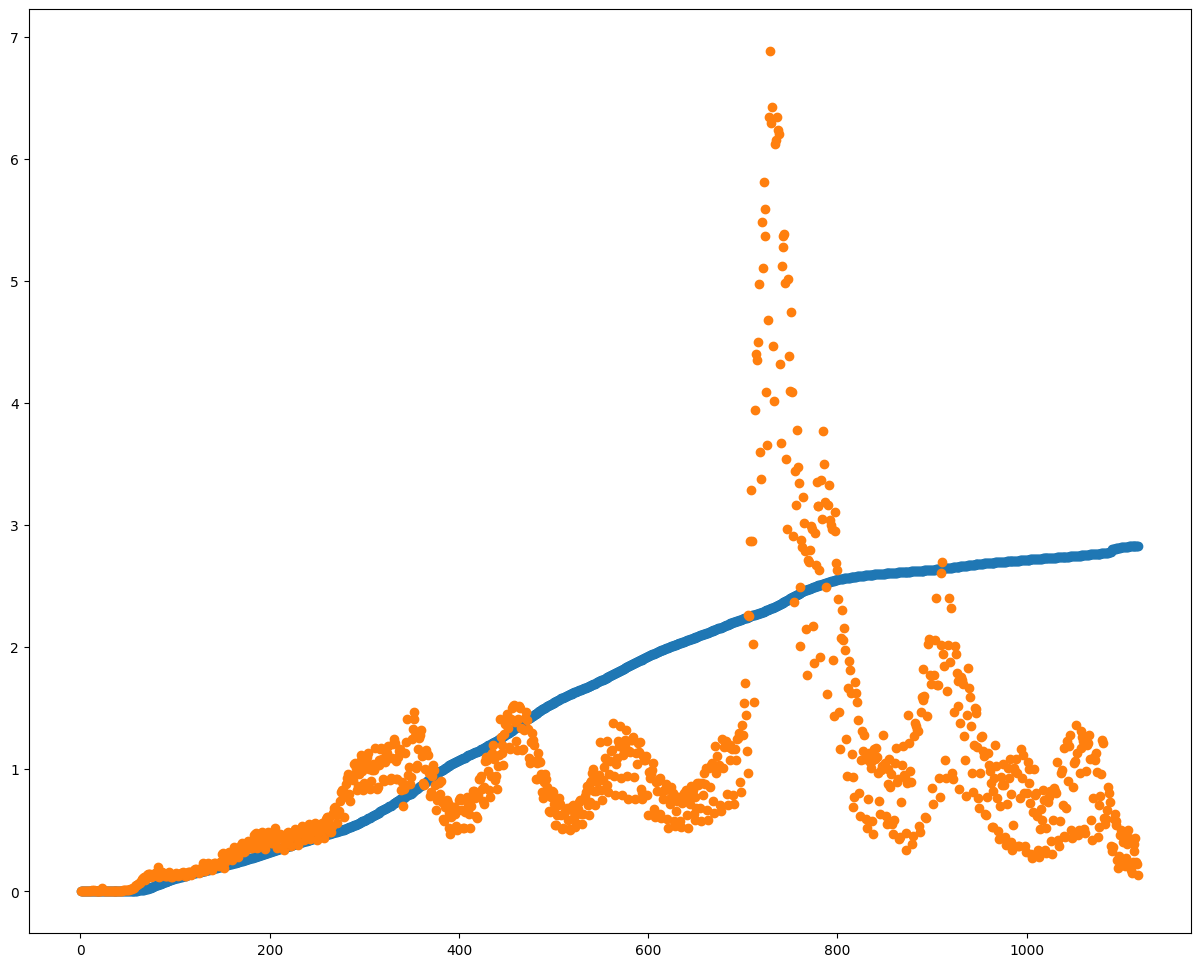

In [57]:
pyplot.scatter(x=[i for i in range(1,len(Main_Data)+1)],y=Main_Data['total_deaths'])
pyplot.scatter(x=[i for i in range(1,len(Main_Data)+1)],y=Main_Data['new_cases'])

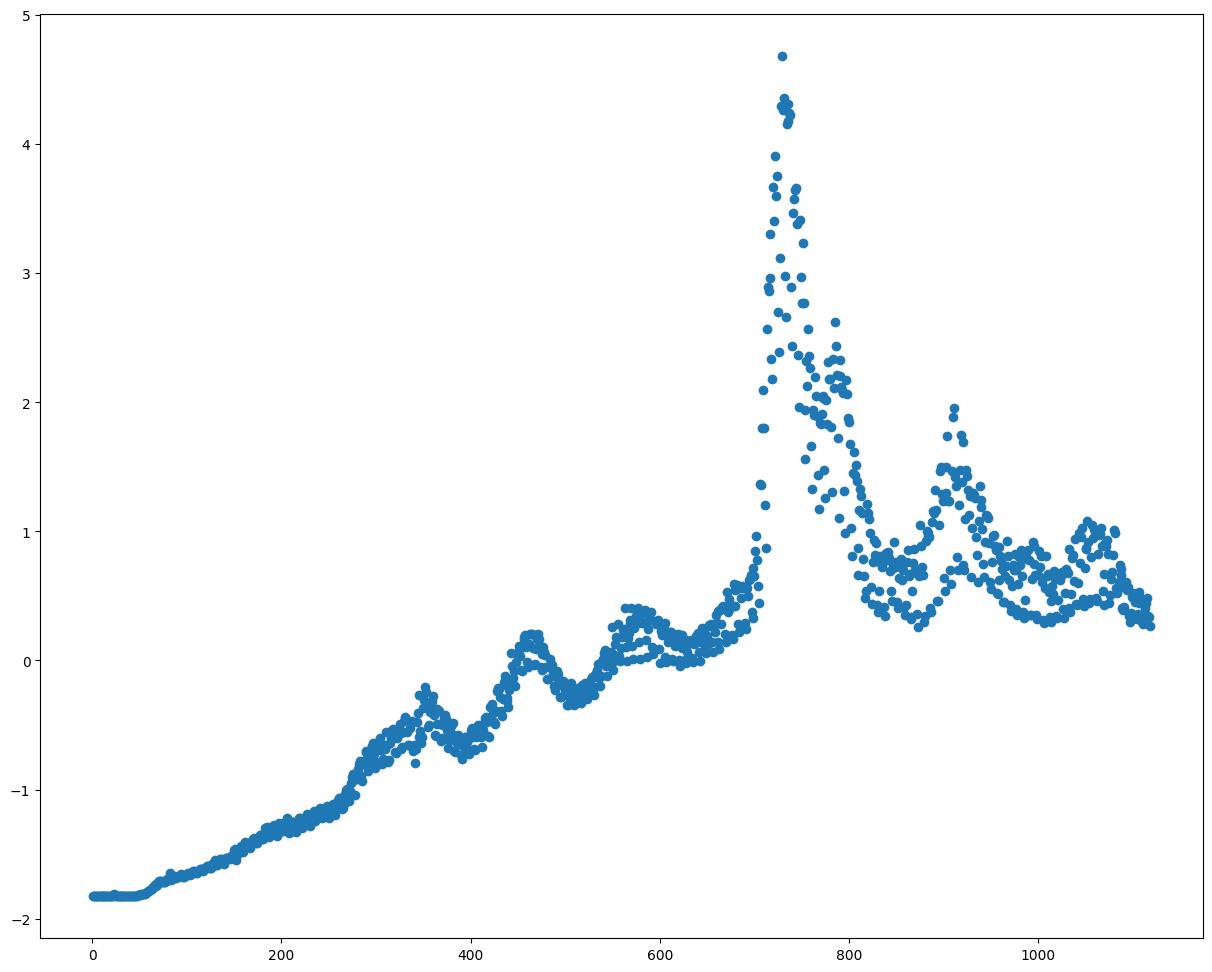

In [58]:
pyplot.scatter(x=[i for i in range(1,len(Main_Data)+1)],y=Component_Data[:,0])

# Testing by Linear Regression

## using Data that not transformed

In [41]:
from sklearn.linear_model import LinearRegression

In [42]:
linear_regression_model=LinearRegression()

In [43]:
linear_regression_model.fit(
    BackupData[['total_deaths','new_cases']].to_numpy(),    BackupData['new_deaths']
)

LinearRegression()

In [44]:
linear_regression_model.predict(BackupData[['total_deaths','new_cases']])

array([1.58439527, 1.58446467, 1.58459344, ..., 0.57936144, 0.57141902,
       0.53328791])

In [52]:
linear_regression_model.coef_,linear_regression_model.intercept_

(array([-0.39006305,  0.41264773]), 1.5843980137343299)

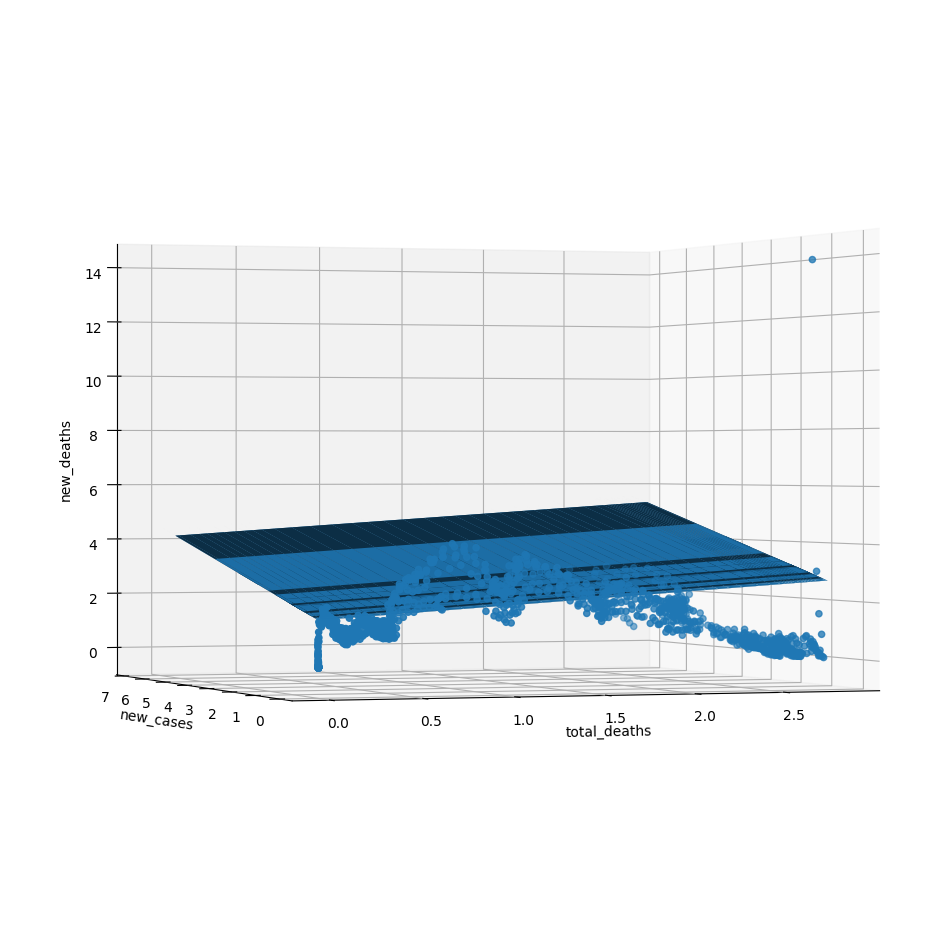

In [131]:
X,Y = numpy.meshgrid(BackupData['total_deaths'],BackupData['new_cases'])
Z = linear_regression_model.intercept_ + linear_regression_model.coef_[1]*X+linear_regression_model.coef_[1]*Y
plotter = pyplot.subplot(projection='3d')

plotter.plot_surface(X, Y, Z)
plotter.scatter3D(BackupData['total_deaths'],BackupData['new_cases'],BackupData['new_deaths'])
plotter.set_xlabel('total_deaths')
plotter.set_ylabel('new_cases')
plotter.set_zlabel('new_deaths')
plotter.view_init(0, 250)

In [108]:
linear_regression_model.predict([BackupData[['total_deaths','new_cases']].iloc[100,:]])

array([1.60451472])

## Using Data That is transformed

In [60]:
Component_Data_Serial=[i[0] for i in Component_Data]

In [62]:
linear_regression_model_for_transformed_data=LinearRegression()

In [77]:
linear_regression_model_for_transformed_data.fit(
    pandas.DataFrame(Component_Data_Serial),Main_Data['new_deaths'].to_numpy()
)

LinearRegression()

In [79]:
linear_regression_model_for_transformed_data.predict(pandas.DataFrame(Component_Data_Serial))

array([1.36050359, 1.3605055 , 1.3605091 , ..., 1.39519114, 1.39497944,
       1.39393931])

In [83]:
linear_regression_model_for_transformed_data.coef_,linear_regression_model_for_transformed_data.intercept_

(array([0.01596978]), 1.3896567367954817)

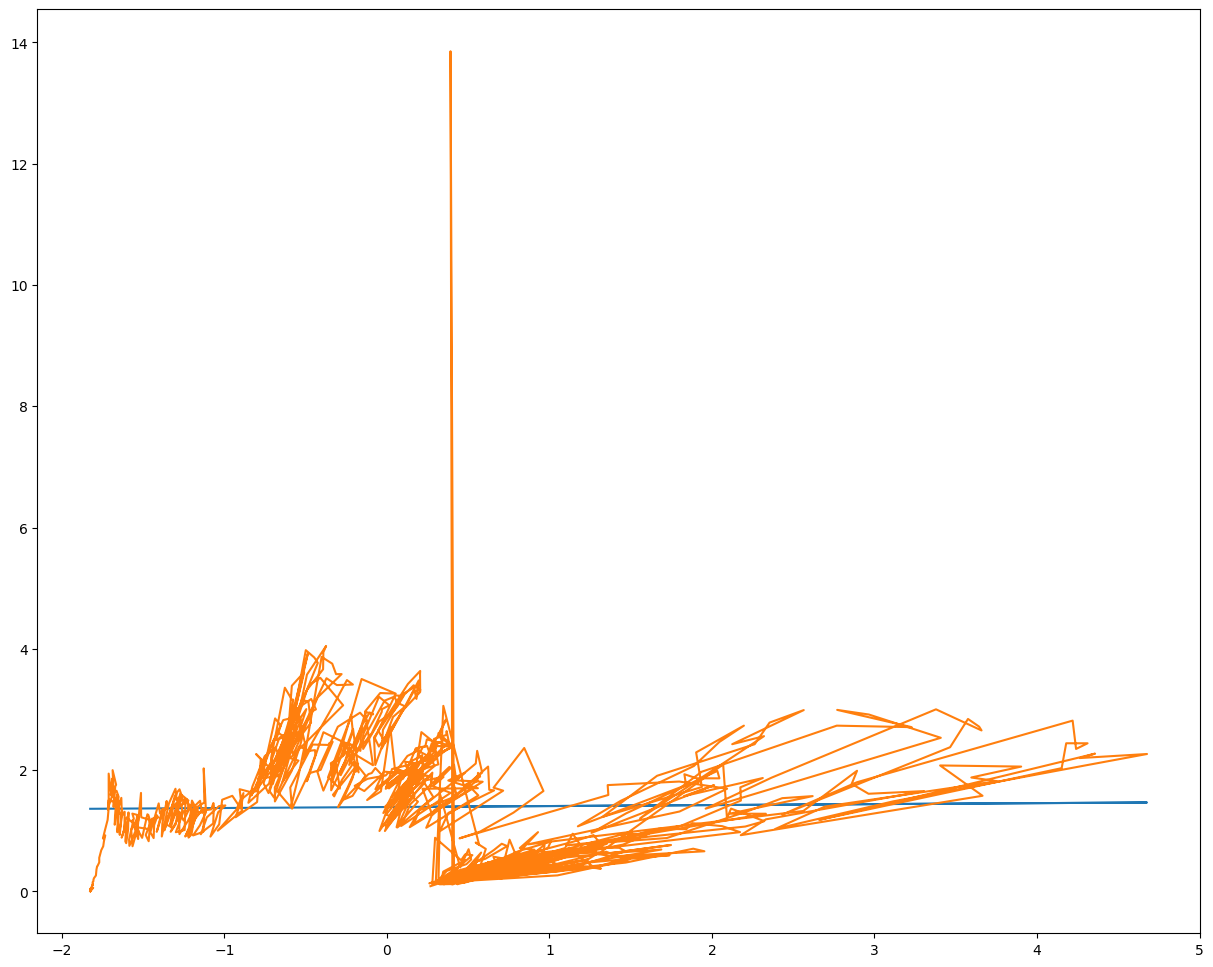

In [110]:
pyplot.plot(Component_Data_Serial,linear_regression_model_for_transformed_data.predict(pandas.DataFrame(Component_Data_Serial)))
pyplot.plot(Component_Data_Serial,BackupData['new_deaths'])

## Following Both shows the increasing trend in values by linear regression fit on data before and after the Transformation

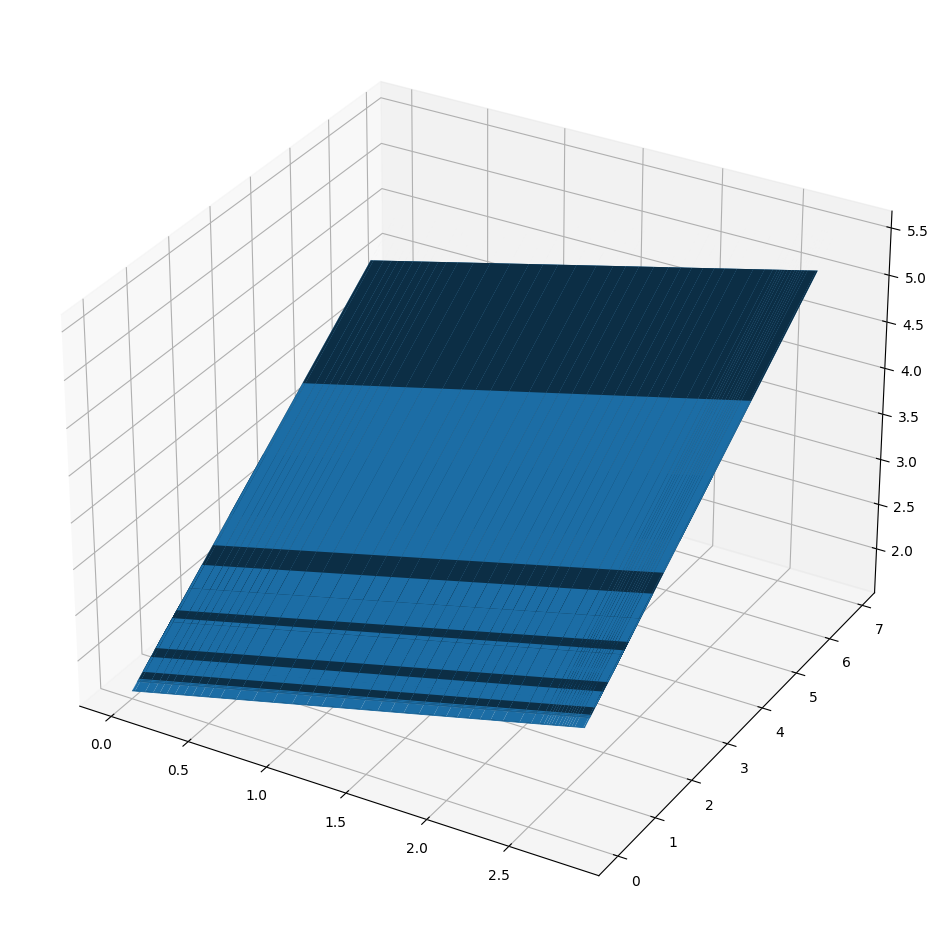

In [97]:
X,Y = numpy.meshgrid(BackupData['total_deaths'],BackupData['new_cases'])
Z = linear_regression_model.intercept_ + linear_regression_model.coef_[1]*X+linear_regression_model.coef_[1]*Y
pyplot.figure().add_subplot(projection='3d').plot_surface(X, Y, Z)

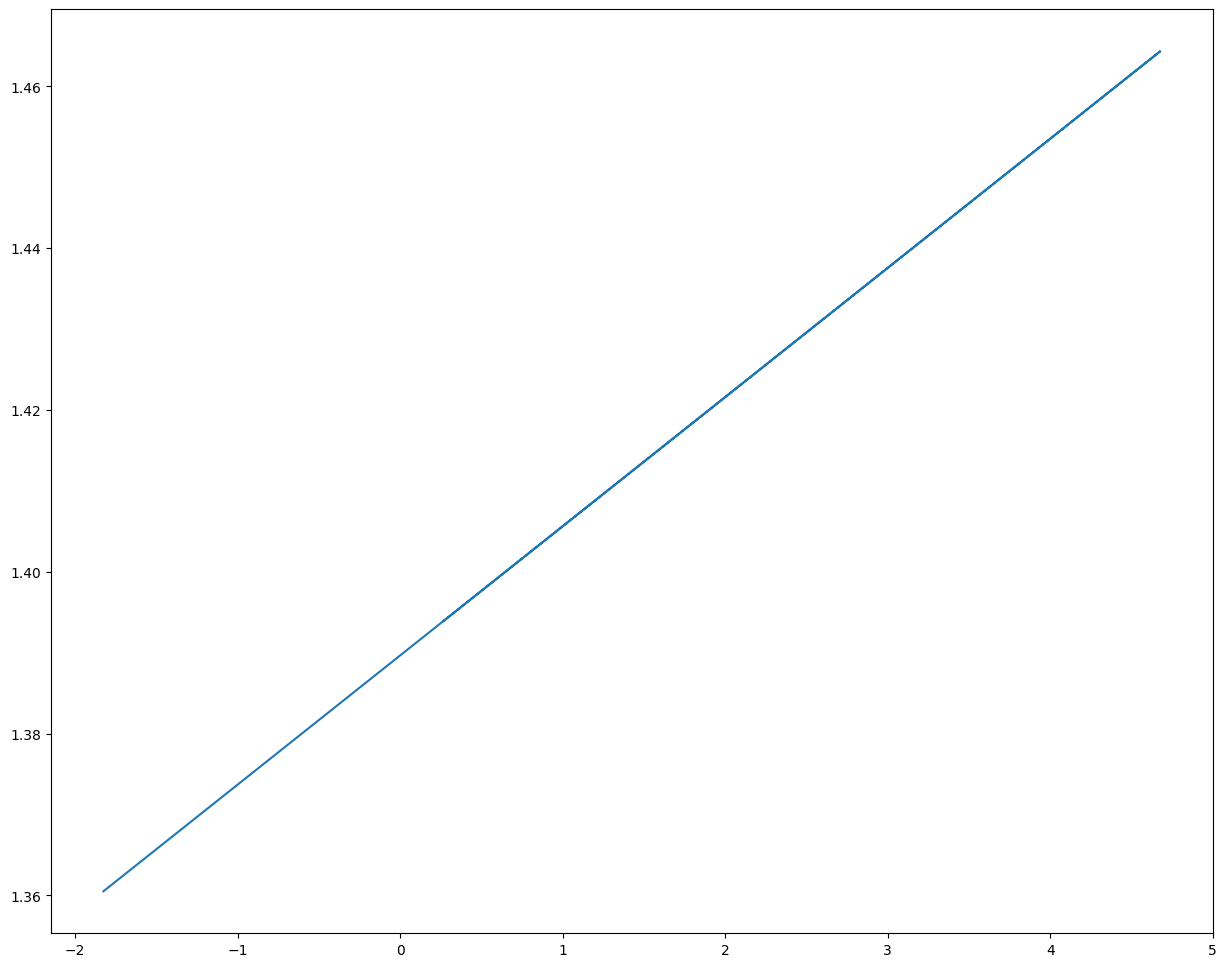

In [111]:
pyplot.plot(Component_Data_Serial,linear_regression_model_for_transformed_data.predict(pandas.DataFrame(Component_Data_Serial)))